In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt
/kaggle/input/movie-genre-classfication/MovieSummaries/tvtropes.clusters.txt
/kaggle/input/movie-genre-classfication/MovieSummaries/movie.metadata.tsv
/kaggle/input/movie-genre-classfication/MovieSummaries/character.metadata.tsv
/kaggle/input/movie-genre-classfication/MovieSummaries/README.txt
/kaggle/input/movie-genre-classfication/MovieSummaries/plot_summaries.txt
/kaggle/input/movie-genre-classfication/MovieSummaries/name.clusters.txt
/kaggle/input/genre-classification-dataset/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset/Genre Classification Dataset/test_data_solution.txt

### **MOVIE GENRE CLASSIFICATION**

### **Multi Label Classcification in NLP** 

An instance or a record will have multiple labels. 
The number of labels is not fixed. 

X is input variables; Y is target variable


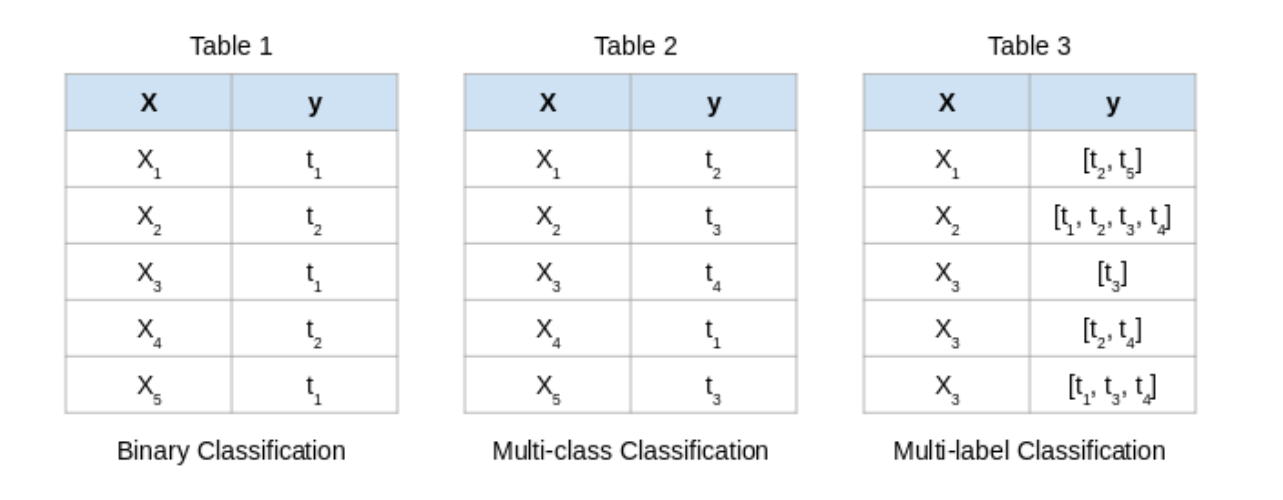

‘y’ is a binary target variable in Table 1. Hence, there are only two labels – t1 and t2

‘y’ contains more than two labels in Table 2. But, notice how there is only one label for every input in both these tables.

‘y’ contains more than two labels in Table 3. We have multiple tags here, not just across the table, but for individual inputs as well

### **Setting up our Multi-Label Classification Problem Statement**

There are several ways of building a recommendation engine. When it comes to movie genres, you can slice and dice the data based on multiple variables. 

Take a look at the below snapshot from IMDb and pick out the different things on display:

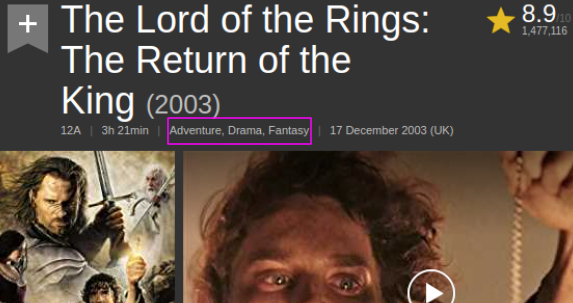


There’s a LOT of information in such a tiny space:

Movie title
Movie rating in the top-right corner
Total movie duration
Release date
And of course, the movie genres which has highlighted in the magenta coloured bounding box


Genres tell us what to expect from the movie. And since these genres are clickable (at least on IMDb), they allow us to discover other similar movies of the same genres.

### **About the Dataset**

We will use the CMU Movie Summary Corpus ([https://www.cs.cmu.edu/~ark/personas/](http://)) open dataset for our project. You can download the dataset directly from this link: [http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz](http://).

This dataset contains multiple files, but we’ll focus on only two of them for now:

movie.metadata.tsv: Metadata for 81,741 movies, extracted from the November 4, 2012 dump of Freebase. The movie genre tags are available in this file.

plot_summaries.txt: Plot summaries of 42,306 movies extracted from the November 2, 2012 dump of English-language Wikipedia. Each line contains the Wikipedia movie ID (which indexes into movie.metadata.tsv) followed by the plot summary.

---------------------------------------------------------------------------


### **Supervised classification algorithms**

Supervised classification algorithms are machine learning techniques used to categorize new data points into predefined classes based on a labeled training dataset. The key aspects are:

**Training data:** A set of labeled examples where each data point has features and a known class label.

**Learning phase:** The algorithm learns patterns and relationships between features and class labels.

**Prediction:** Once trained, the model can classify new, unlabeled data points.




## **Single-Label Classification Metrics:**

**Accuracy:**

The proportion of correct predictions among the total number of cases examined.
Simple to understand but can be misleading for imbalanced datasets.


**Precision:**

The ratio of true positive predictions to the total positive predictions.
Measures how many of the positive predictions are actually correct.
(Cares about FALSE POSITIVE)
(High precision: "When we predict positive, we're usually right")


**Recall (Sensitivity):**

The ratio of true positive predictions to the total actual positive cases.
Measures how many of the actual positive cases were correctly identified. (Cares about FALSE NEGATIVES) 
(High recall: "We find most of the actual positive cases")


**F1 Score:**

The harmonic mean of precision and recall.
Provides a single score that balances both precision and recall.

Formula: **F1 = 2 * (Precision * Recall) / (Precision + Recall)**
Range: 0 (worst) to 1 (best)
Interpretation: A high F1 score indicates both good precision and good recall

EXAMPLE: 
Certainly. Let's use a practical example to illustrate how the F1 score is calculated and interpreted.

> Scenario: Spam Email Detection

Imagine we have an email classification system that tries to identify spam emails. After running our classifier on 1000 emails, we get these results:

- True Positives (TP): 150 (correctly identified spam)
- False Positives (FP): 50 (normal emails incorrectly labeled as spam)
- False Negatives (FN): 30 (spam emails missed)
- True Negatives (TN): 770 (correctly identified normal emails)

Step 1: Calculate Precision
Precision = TP / (TP + FP) = 150 / (150 + 50) = 150 / 200 = 0.75

Step 2: Calculate Recall
Recall = TP / (TP + FN) = 150 / (150 + 30) = 150 / 180 ≈ 0.833

Step 3: Calculate F1 Score
F1 = 2 * (Precision * Recall) / (Precision + Recall)
   = 2 * (0.75 * 0.833) / (0.75 + 0.833)
   = 2 * 0.62475 / 1.583
   ≈ 0.789

Interpretation:
- The F1 score of 0.789 indicates a good balance between precision and recall.
- Our classifier correctly identifies about 83.3% of all spam emails (recall).
- When it labels an email as spam, it's correct about 75% of the time (precision).
- The F1 score of 0.789 gives us a single metric that balances these two aspects.

This F1 score suggests our spam detector is performing well, but there's still room for improvement. Depending on our goals, we might try to improve either precision (to reduce false positives) or recall (to catch more spam), which would in turn affect the F1 score.


**ROC-AUC:**

Area Under the Receiver Operating Characteristic curve.

Measures the ability of the model to distinguish between classes.

Example: 
Suppose the model's ROC curve gives an area under the curve (AUC) of 0.85.
Interpretation: The model has an 85% chance of distinguishing between a positive and a negative class.





### **Multi-Label Classification Metrics:**



**Hamming Loss:**

The fraction of labels that are incorrectly predicted.
Lower values indicate better performance.

Example: 
Consider a dataset with 4 samples, each having 3 possible labels. Suppose the model predicts 2 labels incorrectly across all samples.

Calculation: Hamming Loss = (2 incorrect labels / (4 samples * 3 labels per sample)) = 0.167 or 16.7%


**Subset Accuracy:**

The proportion of samples where all labels are correctly predicted.
Very strict metric, as it requires exact match of all labels.

Example: 
In the same dataset, assume only 1 sample has all its labels predicted correctly.

Calculation: Subset Accuracy = (1 fully correct prediction / 4 samples) = 0.25 or 25%


**Micro-averaged F1 Score:**

Calculates F1 score(avg of false negatives and false positives) globally by counting the total true positives, false negatives, and false positives across all labels.

Example:
Suppose across all labels, the model has 6 true positives, 2 false positives, and 4 false negatives.

Calculation:
Micro Precision = 6 / (6 + 2) = 0.75
Micro Recall = 6 / (6 + 4) = 0.6
Micro F1 Score = 2 * (0.75 * 0.6) / (0.75 + 0.6) = 0.667 or 66.7%


**Macro-averaged F1 Score:**

Calculates F1 score for each label independently and then takes the average.


**Label Ranking Loss:**
Measures the average fraction of label pairs that are incorrectly ordered.
Lower values indicate better performance. It is particularly useful when the order or ranking of predicted labels matters, rather than just their presence or absence.

Example: Consider a dataset where in 3 out of 10 samples, the true labels are ranked below irrelevant ones.

Calculation: Label Ranking Loss = (3 incorrect rankings / 10 samples) = 0.3 or 30%


**Coverage Error:**

Measures how far on average we need to go down the list of predicted labels to cover all the true labels. 
Example :  Consider 4 boxes, A, B, C, D; A and C have treasure. And you dont know which of these boxes have treasures. Only Clues are given. 
Clues: A = 0.8; B = 0.7 ; C = 0.4 ; D = 0.2.
Based on the clues you open A, B, C boxes and found out A and C have treasures. So the coverage error is the amount of times you had to open the boxes. Till you found all treasures. 


**Average Precision:**

The average precision at the positions of all true labels.

An Average Precision of 0.807 means that, on average, the model ranks the relevant labels fairly well. The closer this value is to 1, the better the model is at placing the true labels near the top of the ranked list.






### Key Differences:

Complexity: Multi-label metrics are generally more complex due to the need to account for multiple labels per instance.

Partial Correctness: Multi-label metrics often allow for partial credit, recognizing that getting some labels correct is better than getting none correct.

Label Interactions: Some multi-label metrics consider the relationships and co-occurrences between labels.

Ranking: Several multi-label metrics focus on the ranking of labels, which is often important in multi-label scenarios.

>**Our Strategy to Build a Movie Genre Prediction Model**


We know that we can’t use supervised classification algorithms directly on a multi-label dataset. Therefore, we’ll first have to transform our target variable. Let’s see how to do this using a dummy dataset:
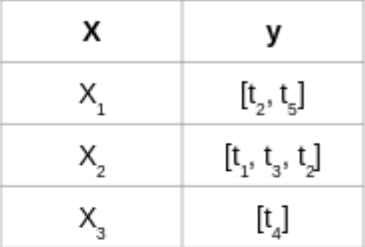

Here, X and y are the features and labels, respectively – it is a multi-label dataset. Now, we will use the Binary Relevance approach to transform our target variable, y. We will first take out the unique labels in our dataset:

Unique labels = [ t1, t2, t3, t4, t5 ]

There are 5 unique tags in the data. Next, we need to replace the current target variable with multiple target variables, each belonging to the unique labels of the dataset. Since there are 5 unique labels, there will be 5 new target variables with values 0 and 1 as shown below:

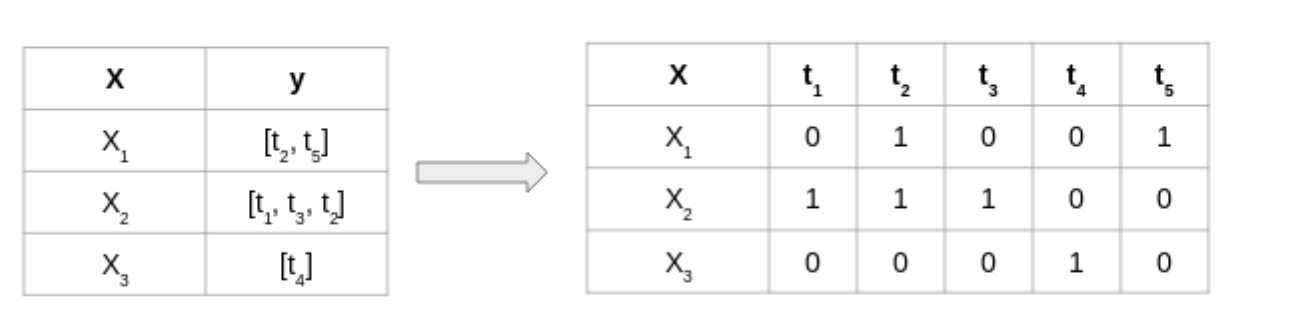

We have now covered the necessary ground to finally start solving this problem.

### **Implementation: Using Multi-Label Classification to Build a Movie Genre Prediction Model (in Python)**


#### **Import the required libraries**

In [2]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import os
import gzip
import shutil
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
import zipfile
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
# Define the path to the .tsv file
file_path = '/kaggle/input/movie-genre-classfication/MovieSummaries/movie.metadata.tsv'

# Read the .tsv file into a DataFrame
meta = pd.read_csv(file_path, sep='\t', header=None)
print(meta.head())


          0           1  \
0    975900   /m/03vyhn   
1   3196793   /m/08yl5d   
2  28463795  /m/0crgdbh   
3   9363483  /m/0285_cd   
4    261236   /m/01mrr1   

                                                       2           3  \
0                                         Ghosts of Mars  2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey Mystery  2000-02-16   
2                                            Brun bitter        1988   
3                                       White Of The Eye        1987   
4                                      A Woman in Flames        1983   

            4      5                                   6  \
0  14010832.0   98.0  {"/m/02h40lc": "English Language"}   
1         NaN   95.0  {"/m/02h40lc": "English Language"}   
2         NaN   83.0  {"/m/05f_3": "Norwegian Language"}   
3         NaN  110.0  {"/m/02h40lc": "English Language"}   
4         NaN  106.0   {"/m/04306rv": "German Language"}   

                                           

There are no headers in this dataset. The first column is the unique movie id, the third column is the name of the movie, and the last column contains the movie genre(s). We will not use the rest of the columns in this analysis.

Let’s add column names to the aforementioned three variables:

In [4]:
# rename columns
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

print(f"Number of columns: {meta.shape[1]}")

# Print the column names
print(f"Column names: {meta.columns.tolist()}")

Number of columns: 9
Column names: ['movie_id', 1, 'movie_name', 3, 4, 5, 6, 7, 'genre']


Now, we will load the movie plot dataset into memory. This data comes in a text file with each row consisting of a movie id and a plot of the movie. We will read it line-by-line:

In [5]:
import csv
from tqdm import tqdm

# Define the path to the .txt file
file_path = '/kaggle/input/movie-genre-classfication/MovieSummaries/plot_summaries.txt'

plots = []

# Read the .txt file into the plots list
with open(file_path, 'r') as f:
    reader = csv.reader(f, dialect='excel-tab') 
    for row in tqdm(reader):
        plots.append(row)

# Optionally, you can print the first few rows to check
print(plots[:5])

42303it [00:01, 23826.55it/s]

[['23890098', "Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."], ['31186339', 'The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker\'s son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special ac

Next, split the movie ids and the plots into two separate lists. We will use these lists to form a dataframe:

In [6]:
movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

100%|██████████| 42303/42303 [00:00<00:00, 824167.12it/s]


In [7]:
movies.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."


Perfect! We have both the movie id and the corresponding movie plot.

### **Data Exploration and Pre-processing**

Let’s add the movie names and their genres from the movie metadata file by merging the latter into the former based on the movie_id column:


In [8]:
# Change datatype of 'movie_id'
meta['movie_id'] = meta['movie_id'].astype(str)

# Merge meta with movies
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on='movie_id')

# Display the first few rows of the merged DataFrame
movies.head()

#This code assumes that meta has been properly loaded and columns have been renamed as needed. Make sure meta and movies DataFrames are defined and contain the necessary columns before running this code.

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


Great! We have added both movie names and genres. However, the genres are in a dictionary notation. It will be easier to work with them if we can convert them into a Python list. We’ll do this using the first row:

In [9]:
movies['genre'][48]


'{"/m/06cvj": "Romantic comedy", "/m/0220p9g": "Musical comedy", "/m/04t36": "Musical", "/m/01z4y": "Comedy", "/m/0hj3mw3": "Beach Film", "/m/02l7c8": "Romance Film", "/m/02b5_l": "Teen"}'

We can’t access the genres in this row by using just .values( ). 
This is because this text is a string, not a dictionary.
We will have to convert this string into a dictionary. 
We will take the help of the json library here:

type(json.loads(movies['genre'][0]))


In [10]:
type(json.loads(movies['genre'][0]))

dict


We can now easily access this row’s genres:


In [11]:
json.loads(movies['genre'][0]).values()

dict_values(['Drama', 'World cinema'])

This code helps us to extract all the genres from the movies data. Once done, add the extracted genres as lists back to the movies dataframe:

In [12]:
# an empty list
genres = [] 

# extract genres
for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = genres

Some of the samples might not contain any genre tags. We should remove those samples as they won’t play a part in our model building process:

In [13]:
# remove samples with 0 genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]
movies_new.shape, movies.shape

((41793, 5), (42204, 5))

Only 411 samples had no genre tags. 

Let’s take a look at the dataframe once again:

In [14]:
movies.head()

,movie_id,plot,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]"


Notice that the genres are now in a list format. 

How many movie genres have been covered in this dataset? 
The below code answers this question:

In [15]:
# get all genre tags in a list
all_genres = sum(genres,[])
len(set(all_genres))

363

There are over 363 unique genre tags in our dataset. 


Let’s find out what are these tags. 
We will use FreqDist( ) from the nltk library to create a dictionary of genres and their occurrence count across the dataset:

In [16]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

Plot the distribution of the movie genres:


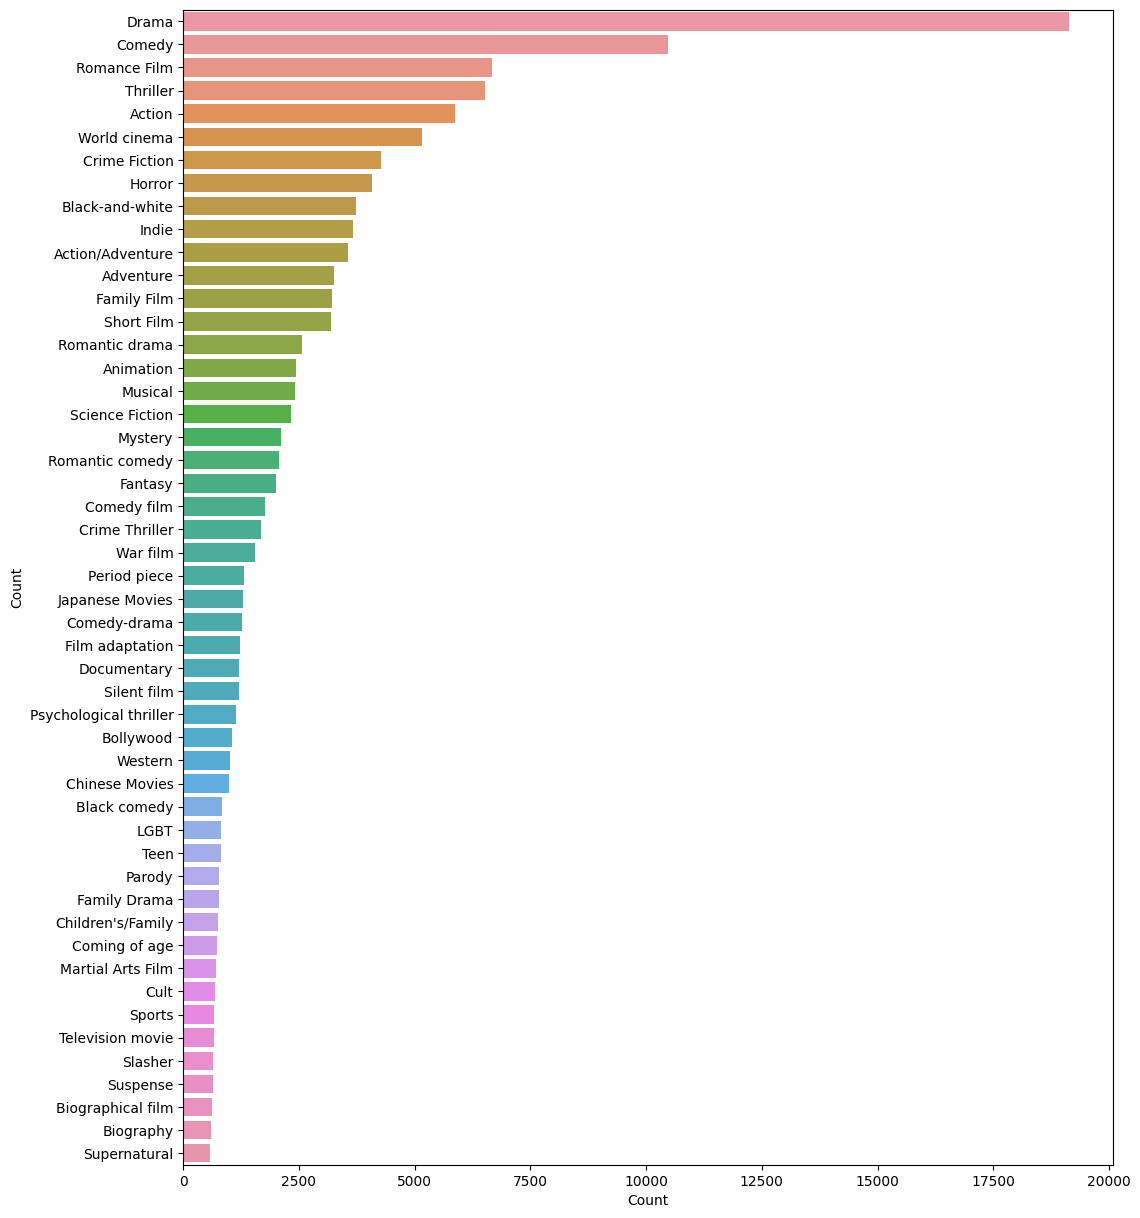

In [17]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

These are the different types of genres avaiblable.

Clean the Dataset:

In [18]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

movies_new = movies_new.copy()  # Create a copy of the DataFrame
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))

movies_new = movies_new.copy()
movies_new.loc[:, 'clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))


# Lambda:
Lambda Functions are a convenient way to write small, throwaway functions quickly, especially when working with functions like map,filter and sorted. 
Its fast and easy.

lambda arguments:expression

Example: Sorting

list= [(1,2), (3,1), (5,4)]

sorted_list = sorted(list,key = lambda x : x[1])

print(sorted_list)


Let’s apply the function on the movie plots by using the apply-lambda duo:

In [19]:
movies_new.head()

,movie_id,plot,movie_name,genre,genre_new,clean_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]",shlykov a hard working taxi driver and lyosha a saxophonist develop a bizarre love hate relationship and despite their prejudices realize they arent so different after all
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]",the nation of panem consists of a wealthy capitol and twelve poorer districts as punishment for a past rebellion each district must provide a boy and girl between the ages of and selected by lottery for the annual hunger games the tributes must fight to the death in an arena the sole survivor is...
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]",poovalli induchoodan is sentenced for six years prison life for murdering his classmate induchoodan the only son of justice maranchery karunakara menon was framed in the case by manapally madhavan nambiar and his crony dysp sankaranarayanan to take revenge on idealist judge menon who had earlier...
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]",the lemon drop kid a new york city swindler is illegally touting horses at a florida racetrack after several successful hustles the kid comes across a beautiful but gullible woman intending to bet a lot of money the kid convinces her to switch her bet employing a prefabricated con unfortunately ...
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]",seventh day adventist church pastor michael chamberlain his wife lindy their two sons and their nine week old daughter azaria are on a camping holiday in the outback with the baby sleeping in their tent the family is enjoying a barbecue with their fellow campers when a cry is heard lindy returns...


In [20]:
movies_new['genre_new'][48]

['Romantic comedy',
 'Musical comedy',
 'Musical',
 'Comedy',
 'Beach Film',
 'Romance Film',
 'Teen']

In the clean_plot column, all the text is in lowercase and there are also no punctuation marks. Our text cleaning has worked like a charm.

The function below will visualize the words and their frequency in a set of documents. 

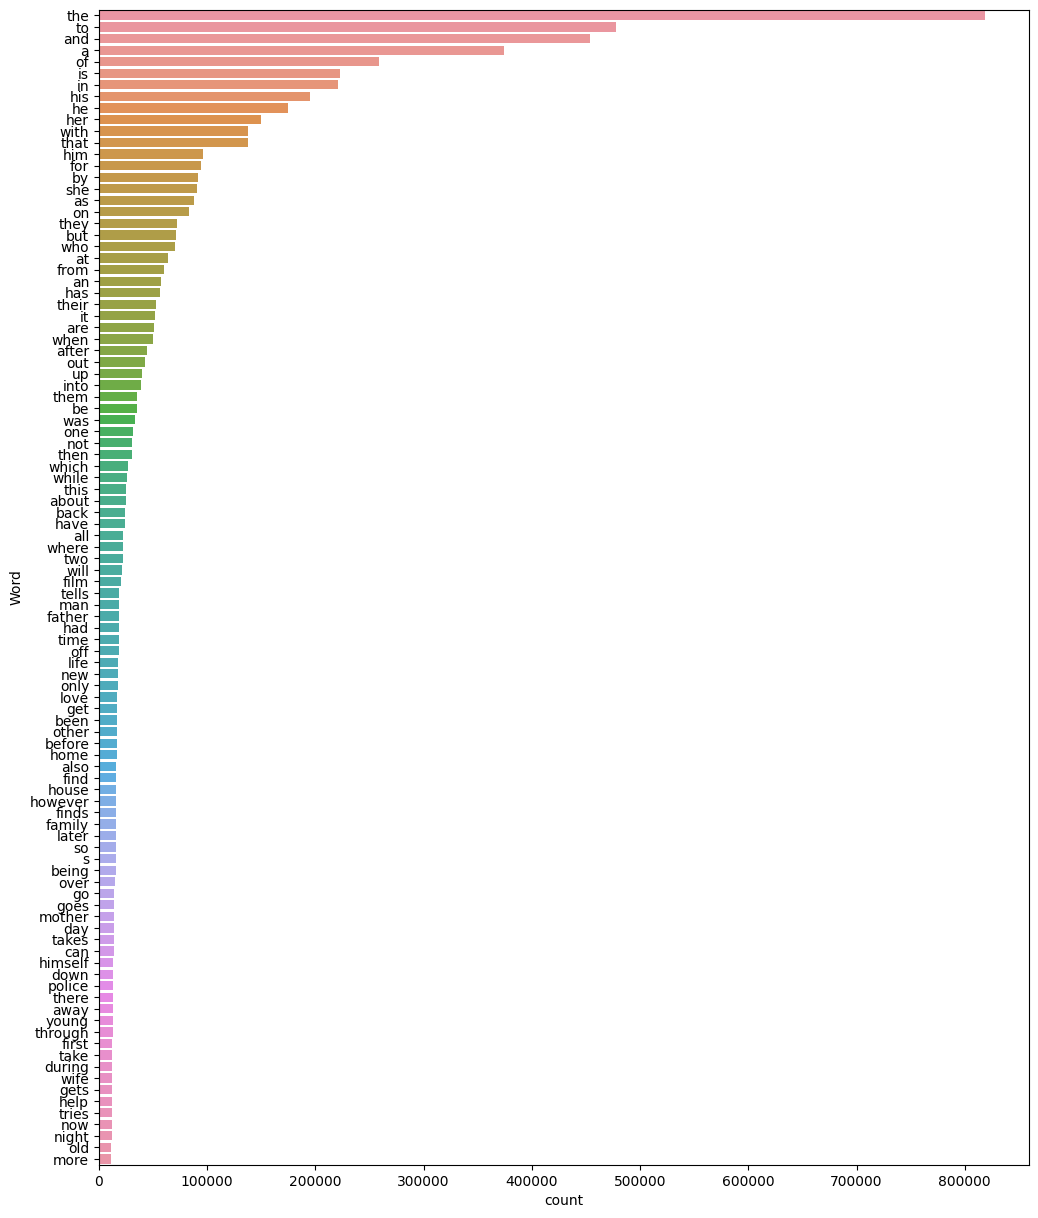

In [21]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies_new['clean_plot'], 100)

Most of the terms in the above plot are stopwords.
These stopwords carry far less meaning than other keywords in the text (they just add noise to the data). 

Remove them from the plots’ text. 

You can download the list of stopwords from the nltk library:

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

Lets Recheck the frequency of words now :

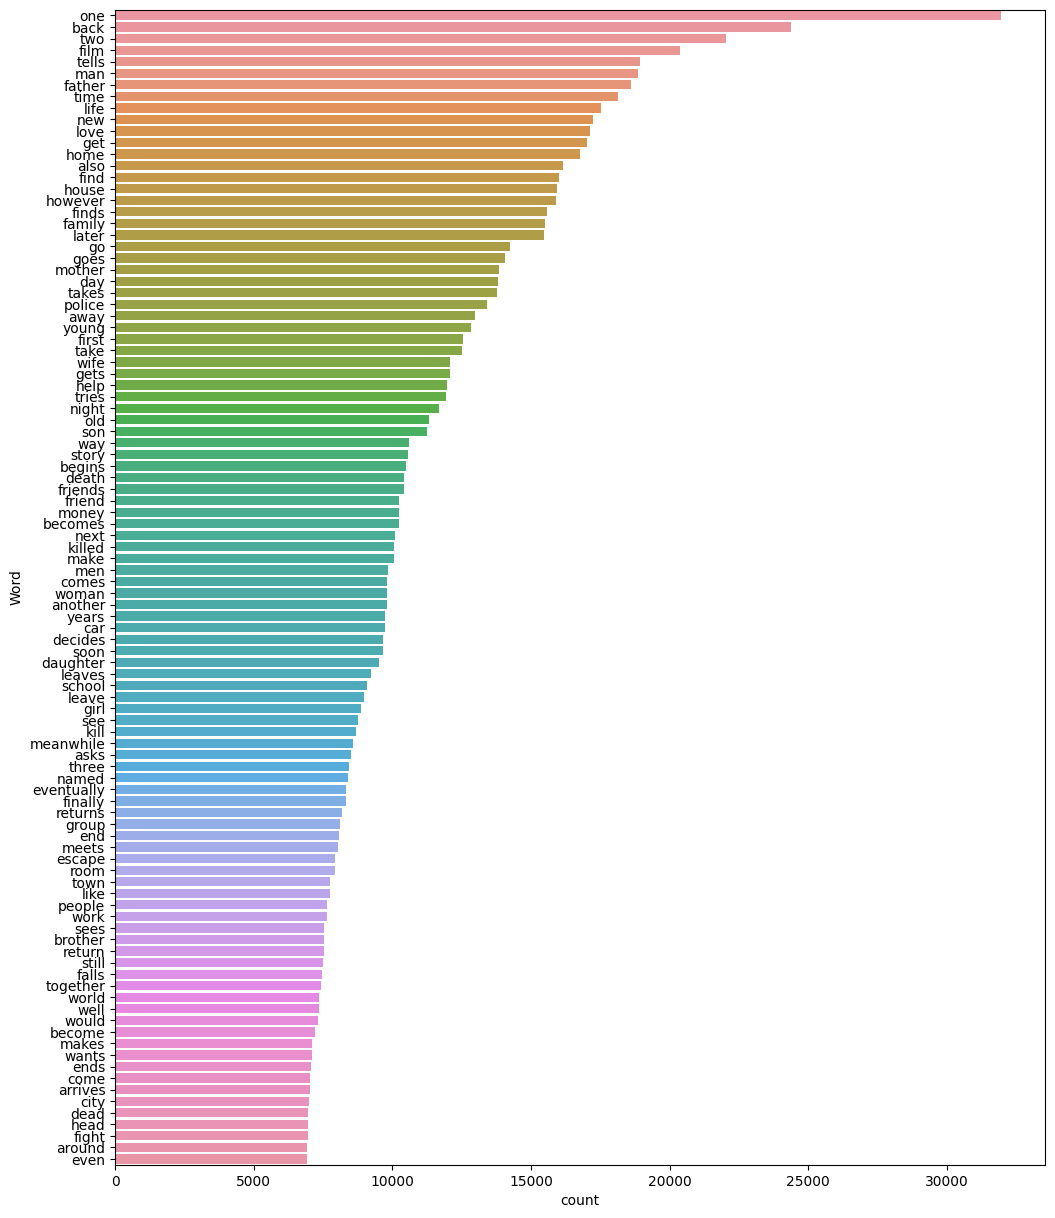

In [24]:
# print 100 most frequent words 
freq_words(movies_new['clean_plot'], 100)

Looks much better, doesn’t it? Far more interesting and meaningful words have now emerged, such as “police”, “family”, “money”, “city”, "death", etc.

### **Converting Text to Features**

Treat this multi-label classification problem as ac
Since there are 363 unique genre tags, there are going to be 363 new target variables.

### **One Hot Encoding**


One-hot encoding is a technique used to convert categorical data into a numerical format that machine learning algorithms can understand. It is commonly used when you have categorical variables (like "red," "blue," "green") and want to represent them in a way that doesn't imply any ordinal relationship between the categories.

### How One-Hot Encoding Works:
Imagine you have a categorical feature with three possible values: "red," "blue," and "green." 

- **Original Categories**: "red," "blue," "green"
- **One-Hot Encoding**: You create a new binary column for each possible category.

### Example:

Let's say you have this data:

| Color  |
|--------|
| Red    |
| Blue   |
| Green  |
| Blue   |
| Red    |

After one-hot encoding, the data would look like this:

| Color_Red | Color_Blue | Color_Green |
|-----------|------------|-------------|
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |
| 0         | 1          | 0           |
| 1         | 0          | 0           |

- **Color_Red** column has a `1` if the original color was "Red," otherwise `0`.
- **Color_Blue** column has a `1` if the original color was "Blue," otherwise `0`.
- **Color_Green** column has a `1` if the original color was "Green," otherwise `0`.

### Why Use One-Hot Encoding?
- **Avoids Implying Order**: If you used numbers like 1, 2, 3 instead, the model might think there's a meaningful order (e.g., 3 is better than 1), which isn't true for categories like colors.
- **Compatibility**: Many machine learning models require numerical input, and one-hot encoding transforms categorical data into a suitable format without losing information.

### Key Points:
- **Number of New Columns**: The number of new columns is equal to the number of unique categories in the original feature.
- **Binary Representation**: Each row is represented by a 1 in the column corresponding to its category and 0 in all other columns.
- **Memory Usage**: One drawback is that it can significantly increase the size of your dataset, especially if the categorical feature has many unique values.

One-hot encoding is an essential preprocessing step for categorical data, helping ensure that machine learning algorithms can effectively use that data.


### **Binary Relevance**
Binary Relevance is a simple approach to handle multi-label classification problems. In a multi-label classification task, each instance (or sample) can belong to more than one class (label). This is different from traditional classification, where each instance belongs to exactly one class.

**What is Binary Relevance?**
Binary Relevance (BR) converts a multi-label classification problem into several independent binary classification problems. For each label in the dataset, it creates a separate binary classifier to predict whether or not the label is relevant for a given instance.

**How Binary Relevance Works:**

**For Each Label:** You treat each label as a separate binary classification problem, where the goal is to predict whether that label is "present" (1) or "absent" (0) for each instance.

**Independent Classifiers:** You train one classifier per label. So if you have 5 labels, you train 5 independent classifiers, each working on one label.

**Predictions:** During prediction, each classifier independently predicts whether a particular label applies to the instance or not.



`sklearn’s MultiLabelBinarizer` is a useful tool in the `scikit-learn` library that transforms a list of labels into a binary matrix (a format that machine learning algorithms can work with). It's specifically designed for **multi-label** problems, where each instance can be associated with multiple labels.

### What Does `MultiLabelBinarizer` Do?

Imagine you have a dataset where each item (e.g., a movie) can belong to multiple categories (e.g., Action, Comedy, Drama). The `MultiLabelBinarizer` converts these multi-label outputs into a binary format, where each label is represented by a separate column, and the presence or absence of a label is indicated by `1` or `0`.

### How It Works:

Let's say you have the following list of labels for your movies:

```python
from sklearn.preprocessing import MultiLabelBinarizer

movies = [
    ('Action', 'Comedy'),
    ('Drama',),
    ('Action', 'Drama'),
    ('Comedy',)
]

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data
binary_labels = mlb.fit_transform(movies)

print(binary_labels)
```

### Output:

```python
[[1 1 0]
 [0 0 1]
 [1 0 1]
 [0 1 0]]
```

- **Rows**: Each row corresponds to a movie.
- **Columns**: Each column corresponds to one of the unique labels (Action, Comedy, Drama).
- **Values**: `1` indicates the presence of a label for that movie, and `0` indicates its absence.

### Label Names:

You can also check the mapping of columns to label names using `mlb.classes_`:

```python
print(mlb.classes_)
```

### Output:

```python
['Action' 'Comedy' 'Drama']
```

This shows that the first column in `binary_labels` corresponds to "Action," the second to "Comedy," and the third to "Drama."

### Why Use `MultiLabelBinarizer`?

1. **Preparation for Machine Learning**: Converts your labels into a numerical format suitable for machine learning models.
2. **Flexibility with Multiple Labels**: Handles cases where each instance can have more than one label.
3. **Inverse Transformation**: You can also convert the binary matrix back to the original list of labels using `inverse_transform()`.

### Example Use Case:

```python
# Inverse transform to get the original labels back
original_labels = mlb.inverse_transform(binary_labels)
print(original_labels)
```

### Output:

```python
[('Action', 'Comedy'), ('Drama',), ('Action', 'Drama'), ('Comedy',)]
```

### Summary:

`MultiLabelBinarizer` is a handy tool in `scikit-learn` for converting multi-label data into a binary matrix, making it easier to feed into machine learning models. It also allows for easy interpretation and transformation back to the original label format.

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])

To extracting features from the cleaned version of the movie plots data. 
I will be using TF-IDF features. 

Other options available : Bag-of-Words, word2vec, GloVe, or ELMo.

### **TF-IDF**

**TF-IDF** (Term Frequency-Inverse Document Frequency) is a numerical statistic used in text processing and information retrieval to evaluate the importance of a word in a document relative to a collection or corpus of documents. It’s a key feature extraction technique for transforming textual data into a form that machine learning algorithms can understand.

### Breaking Down TF-IDF:

1. **Term Frequency (TF)**:
   - **What it Measures**: The frequency of a word in a specific document.
   - **Formula**:
     \[
     \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
     \]
   - **Intuition**: Words that appear more frequently in a document are considered more important.

2. **Inverse Document Frequency (IDF)**:
   - **What it Measures**: The importance of a word across all documents in the corpus. It penalizes common words that appear in many documents.
   - **Formula**:
     \[
     \text{IDF}(t, D) = \log \left(\frac{\text{Total number of documents in the corpus } D}{\text{Number of documents where term } t \text{ appears}}\right)
     \]
   - **Intuition**: Rare words that appear in fewer documents are more important for distinguishing between documents.

3. **TF-IDF Score**:
   - **What it Represents**: A score that reflects how important a word is to a particular document relative to the corpus.
   - **Formula**:
     \[
     \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
     \]
   - **Intuition**: High TF-IDF scores indicate that a term is important to a document but rare across the corpus.

### Example:

Suppose you have the following three documents:

- **Doc 1**: "The cat sat on the mat."
- **Doc 2**: "The dog sat on the mat."
- **Doc 3**: "The cat chased the mouse."

Let's calculate the TF-IDF for the word "cat."

1. **Term Frequency (TF)**:
   - In **Doc 1**, "cat" appears 1 time out of 6 words, so TF = 1/6.
   - In **Doc 2**, "cat" does not appear, so TF = 0.
   - In **Doc 3**, "cat" appears 1 time out of 5 words, so TF = 1/5.

2. **Inverse Document Frequency (IDF)**:
   - The word "cat" appears in 2 out of 3 documents.
   - IDF = log(3/2) = 0.176.

3. **TF-IDF**:
   - **Doc 1**: TF-IDF = (1/6) * 0.176 ≈ 0.029.
   - **Doc 2**: TF-IDF = 0 * 0.176 = 0.
   - **Doc 3**: TF-IDF = (1/5) * 0.176 ≈ 0.035.

So, "cat" has a higher TF-IDF score in Doc 3 than in Doc 1, indicating that it's more important in Doc 3.

### Why TF-IDF is Useful:

1. **Reduces the Influence of Common Words**: Words like "the" or "and" (known as stop words) have high frequency but low importance across many documents, so their TF-IDF score will be low.
2. **Highlights Unique Terms**: Words that are unique to a document or occur in a few documents get a higher TF-IDF score, making them stand out as more relevant.
3. **Feature Extraction for Machine Learning**: TF-IDF transforms text data into numerical vectors that can be used in algorithms like SVM, Naive Bayes, and clustering techniques.

### Implementing TF-IDF in Python:

Using `scikit-learn`, you can easily compute TF-IDF features:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents
documents = [
    "The cat sat on the mat.",
    "The dog sat on the mat.",
    "The cat chased the mouse."
]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the documents into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(documents)

# Display the TF-IDF features
print(tfidf_matrix.toarray())

# Feature names
print(vectorizer.get_feature_names_out())
```

### Output:

The matrix represents the TF-IDF scores for each term in each document. The rows correspond to documents, and the columns correspond to terms.

### Summary:

TF-IDF is a powerful tool for feature extraction in natural language processing (NLP). It helps to identify important words in a document relative to a collection of documents, making it a cornerstone technique for text analysis and machine learning.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer with the specified parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

Used 10k most frequent words as features in the dataset.

Now, before creating TF-IDF features, we will split our data into train and validation sets for training and evaluating our model’s performance. I’m going with a 80-20 split – 80% of the data samples in the train set and the rest in the validation set:

In [27]:
from sklearn.model_selection import train_test_split

# Split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)


Now we can create features for the train and the validation set:

In [28]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

### **Build Your Movie Genre Prediction Model**

We will have to build a model for every one-hot encoded target variable. Since we have 363 target variables, we will have to fit 363 different models with the same set of predictors (TF-IDF features).

As you can imagine, training 363 models can take a considerable amount of time on a modest system. 
Hence, I will build a Logistic Regression model as it is quick to train on limited computational power:

### **Logistic Regression**
Logistic Regression is a popular and simple classification algorithm used in machine learning. Despite its name, it's used for classification tasks rather than regression tasks. It’s particularly useful for binary classification problems but can be extended to multi-class classification.

### Key Concepts:

1. **Logistic Function (Sigmoid Function)**:
   - **Definition**: Logistic Regression uses the sigmoid function to map predicted values (logits) to probabilities between 0 and 1.
   - **Formula**:
     \[
     \text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
     \]
   - **Intuition**: Converts a linear combination of features into a probability, which is then used to classify the instance.

2. **Model Equation**:
   - **Formula**:
     \[
     p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}
     \]
   - **Where**:
     - \( p \) is the probability of the positive class.
     - \( \beta_0 \) is the intercept.
     - \( \beta_i \) are the coefficients for each feature \( x_i \).

3. **Training**:
   - The model is trained using **maximum likelihood estimation**, where it finds the best coefficients (\(\beta\)) that maximize the likelihood of the observed data.

4. **Prediction**:
   - The model predicts the class label by thresholding the probability: if the probability \( p \) is greater than 0.5, classify as 1 (positive class); otherwise, classify as 0 (negative class).

### Implementing Logistic Regression in Python (EXAMPLE):

Here's a step-by-step example of how to implement a Logistic Regression model using `scikit-learn`:

1. **Import Libraries**:

```python
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
```

2. **Prepare Data**:

```python
# Example: Load your data
# movies_new['clean_plot'] should be your feature data
# y should be your target labels

# Split data into training and validation sets
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = vectorizer.fit_transform(xtrain)
xval_tfidf = vectorizer.transform(xval)
```

3. **Train the Model**:

```python
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(xtrain_tfidf, ytrain)
```

4. **Make Predictions and Evaluate**:

```python
# Make predictions on the validation set
yval_pred = model.predict(xval_tfidf)

# Evaluate the model
accuracy = accuracy_score(yval, yval_pred)
report = classification_report(yval, yval_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
```

### Summary:

- **Logistic Regression** is a simple and effective classification algorithm that uses a logistic function to model probabilities.
- **Steps**: Import necessary libraries, prepare data (including vectorizing text with TF-IDF), train the model, and evaluate its performance.
- **Evaluation Metrics**: Use metrics like accuracy and the classification report to assess the model’s performance.

This method is particularly useful for binary and multi-class classification problems where interpretability and simplicity are important.

In [29]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

We will use sk-learn’s OneVsRestClassifier class to solve this problem as a Binary Relevance or one-vs-all problem:

`sklearn`'s `OneVsRestClassifier` is a useful strategy for handling multi-class classification problems, especially when you have a dataset with more than two classes. It is a method of transforming a multi-class classification problem into multiple binary classification problems.

### What is One-vs-Rest (OvR)?

In the One-vs-Rest approach (also known as One-vs-All), you train one classifier per class. For each classifier, the class is treated as the positive class, and all other classes are treated as the negative class. This results in as many binary classifiers as there are classes in the problem.

### How It Works:

1. **Training**:
   - For each class \(i\), train a binary classifier that distinguishes class \(i\) from all other classes.
   - For example, if you have 3 classes (A, B, C), you will train 3 classifiers:
     - Classifier 1: A vs. Not-A (B or C)
     - Classifier 2: B vs. Not-B (A or C)
     - Classifier 3: C vs. Not-C (A or B)

2. **Prediction**:
   - For a new sample, each classifier will output a probability or a score for its class.
   - The class with the highest score or probability is chosen as the final prediction.

### Implementing OneVsRestClassifier in Python (EXAMPLE):

Here’s a step-by-step example of how to use `OneVsRestClassifier` with `scikit-learn`:

1. **Import Libraries**:

```python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
```

2. **Prepare Data**:

```python
# Example: Create a synthetic dataset or load your data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_labels=1, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
```

3. **Initialize and Train OneVsRestClassifier**:

```python
# Initialize the base classifier (e.g., Logistic Regression)
base_classifier = LogisticRegression()

# Initialize OneVsRestClassifier with the base classifier
ovr_classifier = OneVsRestClassifier(base_classifier)

# Train the OneVsRestClassifier
ovr_classifier.fit(X_train, y_train)
```

4. **Make Predictions and Evaluate**:

```python
# Make predictions on the validation set
y_pred = ovr_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
```

### Summary:

- **OneVsRestClassifier** is a method for multi-class classification that transforms it into multiple binary classification problems.
- **Implementation**: Use `OneVsRestClassifier` with any binary classifier (e.g., Logistic Regression) as the base classifier.
- **Training**: The model trains multiple classifiers, each responsible for distinguishing one class from all others.
- **Prediction**: For a new sample, the classifier with the highest score determines the final class.

This approach is effective for handling multi-class problems with various base classifiers and is supported by `scikit-learn` for ease of implementation.

In [30]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

Finally, fit the model on the train set:

In [31]:
#Fixing Error 
#Check and Preprocess Labels: 
#Ensure that your labels are correctly assigned and that these labels are not a result of incorrect data preprocessing.
import numpy as np
import pandas as pd

# Sum occurrences of each label in the training data
label_counts = np.sum(ytrain, axis=0)

# Identify labels present in all training examples
labels_present_in_all = np.where(label_counts == ytrain.shape[0])[0]

# Print labels that are present in all training examples
print("Labels present in all training examples:", labels_present_in_all)


Labels present in all training examples: []


In [32]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 182 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 214 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 245 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression())

Predict movie genres on the validation set:

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize and fit TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = vectorizer.fit_transform(xtrain)
xval_tfidf = vectorizer.transform(xval)

# Initialize and fit the OneVsRestClassifier with Logistic Regression
clf = OneVsRestClassifier(LogisticRegression())

# Train the model
clf.fit(xtrain_tfidf, ytrain)

# Identify labels present in all training examples
label_counts = np.sum(ytrain, axis=0)
labels_present_in_all = np.where(label_counts == ytrain.shape[0])[0]

# Remove labels present in all examples
ytrain_filtered = np.delete(ytrain, labels_present_in_all, axis=1)
yval_filtered = np.delete(yval, labels_present_in_all, axis=1)

# Refit the model with the filtered data
clf.fit(xtrain_tfidf, ytrain_filtered)

# Evaluate the model
yval_pred = clf.predict(xval_tfidf)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(yval_filtered, yval_pred)
report = classification_report(yval_filtered, yval_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 182 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 214 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 245 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 182 is present in all training examples.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 214 is present in all training 

Accuracy: 0.07
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00         1
           2       0.64      0.25      0.36      1154
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        82
           5       0.58      0.11      0.18       696
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        28
           8       0.71      0.15      0.25       639
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        23
          15       0.00      0.00      0.00        22
          16       0.00      0.00      0.00

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

Let’s check out a sample from these predictions:

In [35]:
y_pred[3]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

It is a binary one-dimensional array of length 363. Basically, it is the one-hot encoded form of the unique genre tags. We will have to find a way to convert it into movie genre tags.

Luckily, sk-learn comes to our rescue once again. We will use the inverse_transform( ) function along with the MultiLabelBinarizer( ) object to convert the predicted arrays into movie genre tags:

In [36]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Action', 'Drama')

However, to evaluate our model’s overall performance, we need to take into consideration all the predictions and the entire target variable of the validation set:

In [37]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.3156683206302113

We get a decent F1 score of 0.315. These predictions were made based on a threshold value of 0.5, which means that the probabilities greater than or equal to 0.5 were converted to 1’s and the rest to 0’s.

Let’s try to change this threshold value and see if that improves our model’s score:

In [38]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

Now set a threshold value:

In [39]:
t = 0.2 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

I have tried 0.2 as the threshold value. You should try other values as well. Let’s check the F1 score again on these new predictions.

In [40]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.4701317543060546

That is quite a big boost in our model’s performance. A better approach to find the right threshold value would be to use a k-fold cross validation setup and try different values.



### **Create Inference Function**

We also have to take care of the new data or new movie plots that will come in the future, right? 
Our movie genre prediction system should be able to take a movie plot in raw form as input and generate its genre tag(s).

To achieve this, let’s build an inference function. It will take a movie plot text and follow the below steps:

* Clean the text
* Remove stopwords from the cleaned text
* Extract features from the text
* Make predictions
* Return the predicted movie genre tags

In [41]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

Let’s test this inference function on a few samples from our validation set:

In [42]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies_new['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genre_new'][k], "\n")

Movie:  Texas 
Predicted genre:  [('Drama',)]
Actual genre:  ['Action/Adventure', 'Western', 'Action', 'Drama'] 

Movie:  Venussian tabutasco 
Predicted genre:  [()]
Actual genre:  ['Indie'] 

Movie:  The Sensei 
Predicted genre:  [('Drama',)]
Actual genre:  ['LGBT', 'Action/Adventure', 'Martial Arts Film', 'Drama', 'Indie'] 

Movie:  The Last House in the Woods 
Predicted genre:  [()]
Actual genre:  ['Thriller', 'Horror', 'Splatter film'] 

Movie:  Stitch! The Movie 
Predicted genre:  [('Science Fiction',)]
Actual genre:  ["Children's/Family", 'Animation', "Children's", 'Comedy', 'Family Film', "Children's Fantasy"] 

